# Intoduction

**Welcome to my project, where I employ the spaCy library to train a model for entity recognition in text. The primary goal of the project is to identify geographical names and other key entities related to mountains and mountainous landscapes.**

---
### NER-Training-Spacy-3.0
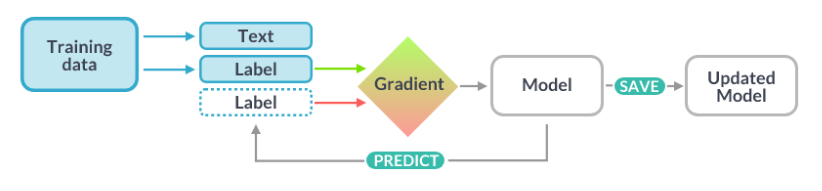

## Workflow of this notebook
**1)** [Introducing Dataset](#h1)             
**2)** [Processing and Training](#h2)      
**3)** [Saving the Trained Model](#h3)       
**4)** [Testing and Utilization](#h4)                           

## Training Data Set<a class="anchor"  id="h1"></a>
For model training, I use a dataset consisting of texts containing information about various mountains worldwide. Each text is accompanied by an annotation containing character indices indicating the start and end of entities in the text.

This DataSet helped me to compile GPT:

In [6]:
train_data_mountains = [
    ('The Carpathians are a mountain range that stretches through several countries, including Ukraine and Poland.', {'entities': [(4, 13, 'Carpathians')]}),
    ('Elbrus is the highest mountain in Europe, located in the Caucasus Mountains.', {'entities': [(0, 6, 'Elbrus')]}),
    ('The Rockies, or Rocky Mountains, are a major mountain range in western North America.', {'entities': [(4, 10, 'Rockies'), (15, 29, 'Rocky Mountains')]}),
    ('Mount Everest is the highest mountain in the world, located in the Himalayas.', {'entities': [(0, 13, 'Mount Everest')]}),
    ('K2, also known as Mount Godwin-Austen, is the second-highest mountain on Earth.', {'entities': [(0, 1, 'K2'), (18, 38, 'Mount Godwin-Austen')]}),
    ('The Andes is the longest continental mountain range in the world, extending through seven countries in South America.', {'entities': [(4, 9, 'Andes')]}),
    ('Denali, also known as Mount McKinley, is the highest mountain peak in North America.', {'entities': [(0, 6, 'Denali'), (18, 34, 'Mount McKinley')]}),
    ('The Alps are the highest and most extensive mountain range system that lies entirely in Europe.', {'entities': [(4, 8, 'Alps')]}),
    ('Matterhorn is a famous mountain in the Pennine Alps on the border between Switzerland and Italy.', {'entities': [(0, 10, 'Matterhorn')]}),
    ('The Ural Mountains form a natural boundary between Europe and Asia.', {'entities': [(4, 18, 'Ural Mountains')]}),
    ('Mount Kilimanjaro is the highest mountain in Africa, located in Tanzania.', {'entities': [(0, 16, 'Mount Kilimanjaro')]}),
    ('The Appalachian Mountains are a system of mountains in eastern North America.', {'entities': [(4, 21, 'Appalachian Mountains')]}),
    ('Aconcagua is the highest mountain outside of Asia, located in the Andes range.', {'entities': [(0, 8, 'Aconcagua')]}),
    ('Mount Fuji is an iconic volcano and the highest peak in Japan.', {'entities': [(0, 9, 'Mount Fuji')]}),
    ('The Sierra Nevada is a mountain range in the western United States.', {'entities': [(4, 17, 'Sierra Nevada')]}),
]

#### At first create your annotations with the help of an external tool to create a json file from train_data_mountains
https://tecoholic.github.io/ner-annotator/

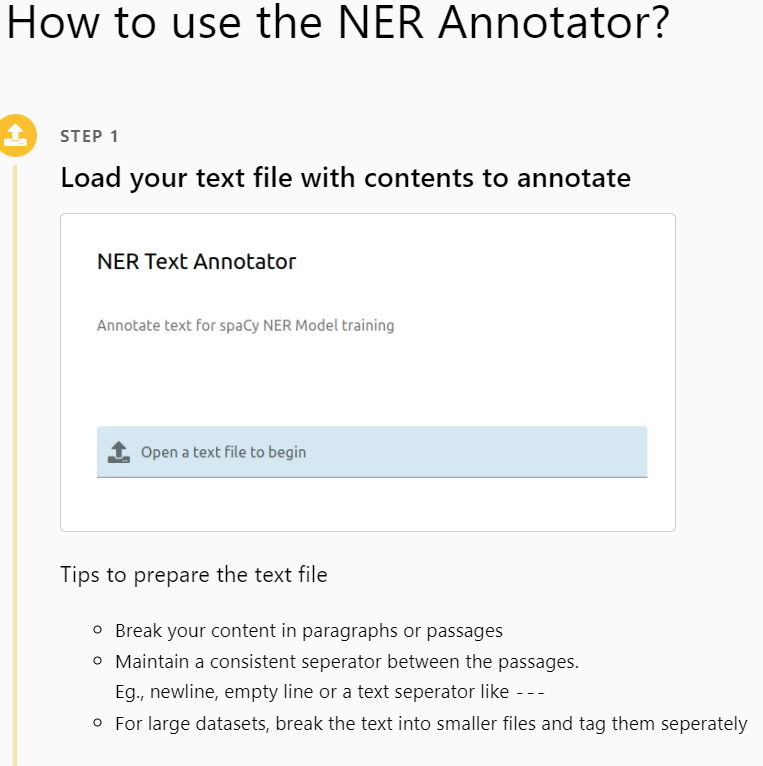

**then you can drop it into a project file and import the file as json**

## Importing libraries needed for this part of notebook <a class="anchor"  id="h2.5"></a>

In [33]:
import pandas as pd
import json
import os
import warnings
warnings.filterwarnings('ignore')

with open('annotations.json', 'r') as f:
    data = json.load(f)

####   In the part of project I use the following libraries:
- pandas - for working with data in DataFrame format.
- json - for handling JSON data.
- os - for interaction with the operating system.
- warnings - for managing warnings.
- spacy - for natural language processing and visualization of results.


In [8]:
data

{'classes': [],
 'annotations': [['The Carpathians are a mountain range that stretches through several countries, including Ukraine and Poland.\r',
   {'entities': [[4, 15, 'CARPATHIANS']]}],
  ['Elbrus is the highest mountain in Europe, located in the Caucasus Mountains.\r',
   {'entities': [[0, 6, 'ELBRUS']]}],
  ['The Rockies, or Rocky Mountains, are a major mountain range in western North America.\r',
   {'entities': [[16, 31, 'ROCKY MOUNTAINS']]}],
  ['Mount Everest is the highest mountain in the world, located in the Himalayas.\r',
   {'entities': [[0, 13, 'MOUNT EVEREST']]}],
  ['K2, also known as Mount Godwin-Austen, is the second-highest mountain on Earth.\r',
   {'entities': [[0, 2, 'K2'], [18, 37, 'MMOUNT GODWIN-AUSTEN']]}],
  ['The Andes is the longest continental mountain range in the world, extending through seven countries in South America.\r',
   {'entities': [[4, 9, 'ANDES']]}],
  ['Denali, also known as Mount McKinley, is the highest mountain peak in North America.\r'

In [9]:
train_data = data['annotations']
train_data = [tuple(i) for i in train_data]

In [10]:
train_data

[('The Carpathians are a mountain range that stretches through several countries, including Ukraine and Poland.\r',
  {'entities': [[4, 15, 'CARPATHIANS']]}),
 ('Elbrus is the highest mountain in Europe, located in the Caucasus Mountains.\r',
  {'entities': [[0, 6, 'ELBRUS']]}),
 ('The Rockies, or Rocky Mountains, are a major mountain range in western North America.\r',
  {'entities': [[16, 31, 'ROCKY MOUNTAINS']]}),
 ('Mount Everest is the highest mountain in the world, located in the Himalayas.\r',
  {'entities': [[0, 13, 'MOUNT EVEREST']]}),
 ('K2, also known as Mount Godwin-Austen, is the second-highest mountain on Earth.\r',
  {'entities': [[0, 2, 'K2'], [18, 37, 'MMOUNT GODWIN-AUSTEN']]}),
 ('The Andes is the longest continental mountain range in the world, extending through seven countries in South America.\r',
  {'entities': [[4, 9, 'ANDES']]}),
 ('Denali, also known as Mount McKinley, is the highest mountain peak in North America.\r',
  {'entities': [[22, 36, 'MOUNT MCKINLEY']

In [11]:
# Loop through the training data
for i in train_data:
    # Check if the 'entities' key in the annotation is empty
    if i[1]['entities'] == []:
        # If empty, assign a default entity (0, 0, entity_name)
        i[1]['entities'] = (0, 0, entity_name)
    else:
        # If not empty, convert the first entity to a tuple
        i[1]['entities'][0] = tuple(i[1]['entities'][0])

In [12]:
train_data

[('The Carpathians are a mountain range that stretches through several countries, including Ukraine and Poland.\r',
  {'entities': [(4, 15, 'CARPATHIANS')]}),
 ('Elbrus is the highest mountain in Europe, located in the Caucasus Mountains.\r',
  {'entities': [(0, 6, 'ELBRUS')]}),
 ('The Rockies, or Rocky Mountains, are a major mountain range in western North America.\r',
  {'entities': [(16, 31, 'ROCKY MOUNTAINS')]}),
 ('Mount Everest is the highest mountain in the world, located in the Himalayas.\r',
  {'entities': [(0, 13, 'MOUNT EVEREST')]}),
 ('K2, also known as Mount Godwin-Austen, is the second-highest mountain on Earth.\r',
  {'entities': [(0, 2, 'K2'), [18, 37, 'MMOUNT GODWIN-AUSTEN']]}),
 ('The Andes is the longest continental mountain range in the world, extending through seven countries in South America.\r',
  {'entities': [(4, 9, 'ANDES')]}),
 ('Denali, also known as Mount McKinley, is the highest mountain peak in North America.\r',
  {'entities': [(22, 36, 'MOUNT MCKINLEY')

## Processing and Training<a class="anchor"  id="h2"></a>
**Next, I use the spaCy library to create Doc objects for each text and provide the model with information about entities in these texts. The processed data is stored in a special container called DocBin.**

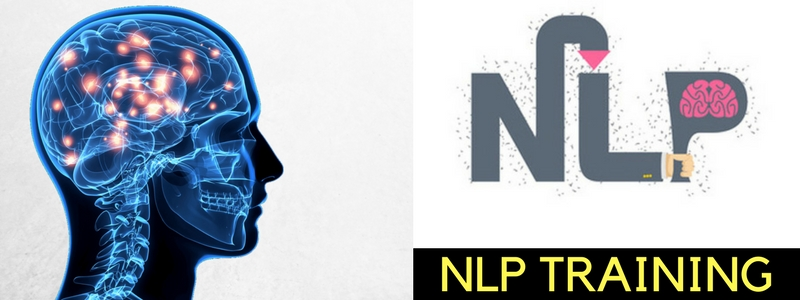

### Import the corresponding libraries

In [13]:
from tqdm import tqdm
import spacy
from spacy.tokens import DocBin

####   In the part of project I use the following libraries:
- tqdm: This library is used to create progress bars in loops, making it easier to track the progress of tasks that may take some time to complete. In your code, it appears that you are using tqdm to display a progress bar when processing the training data.

- spacy: The spaCy library is a natural language processing (NLP) library that provides tools for working with human language data. In your program, you use spaCy for tasks such as creating Doc objects, entity recognition, and training an NLP model. The spacy.tokens module is specifically used to import the DocBin class, which is a container for spaCy Doc objects that can be serialized for efficient storage and loading of large datasets during training.

In [14]:
#nlp = spacy.blank("en") # load a new spacy model
nlp = spacy.load("en_core_web_sm") # load other spacy model

In [15]:
nlp

In [16]:
db = DocBin() # create a DocBin object

In [17]:
for text, annot in tqdm(train_data): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 3963.37it/s]


## Saving the Trained Model <a class="anchor"  id="h3"></a>

In [18]:
db.to_disk("./train.spacy")

### Then, in order to use this trained model in the future, we need to create and fill a Config file

### Step 1: Creating the Config file for training the model
https://spacy.io/usage/training#config

**Follow the steps as in the photo:**
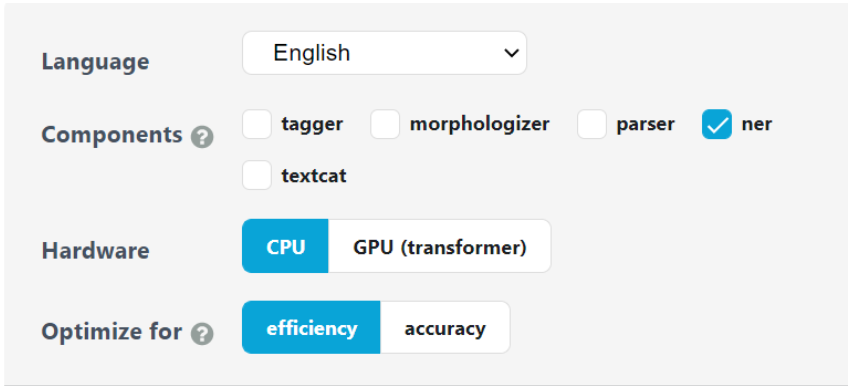

**Then download it:**
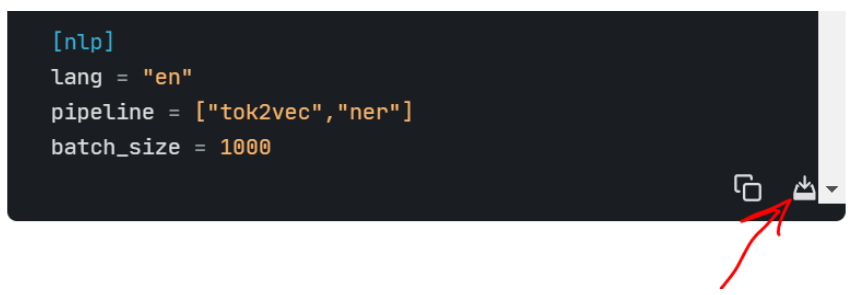

### Step 2: Filling the Config file

Go to the directory where base_config.cfg is stored and then run this command

python -m spacy init fill-config base_config.cfg config.cfg

### Step 3:  Run the Training configuration

python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy 

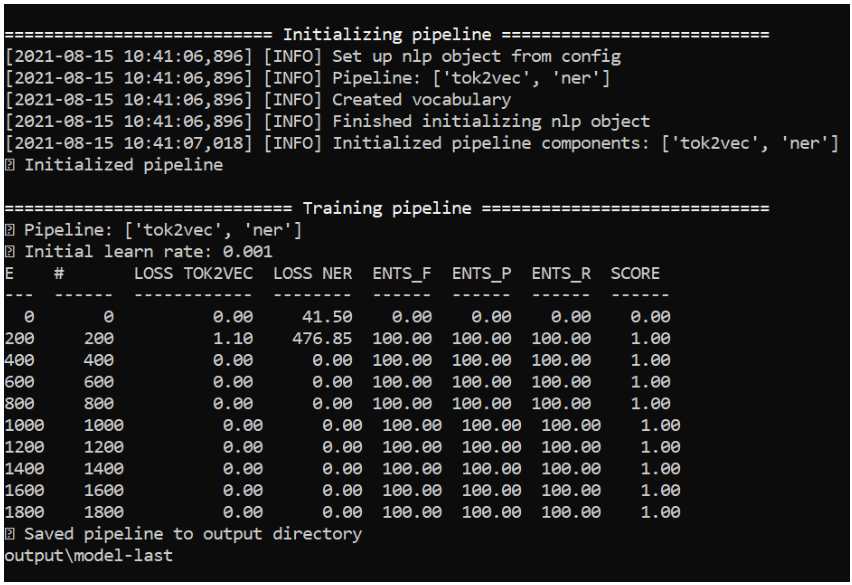

## Model Training Completion and Transition to Utilization
<a class="anchor"  id="h4"></a>
Completion of model training and transition to use
After completing the process of model formation and training, we have successfully equipped our system to recognize entities related to mountain regions in text. The trained model was saved for use in the next file.

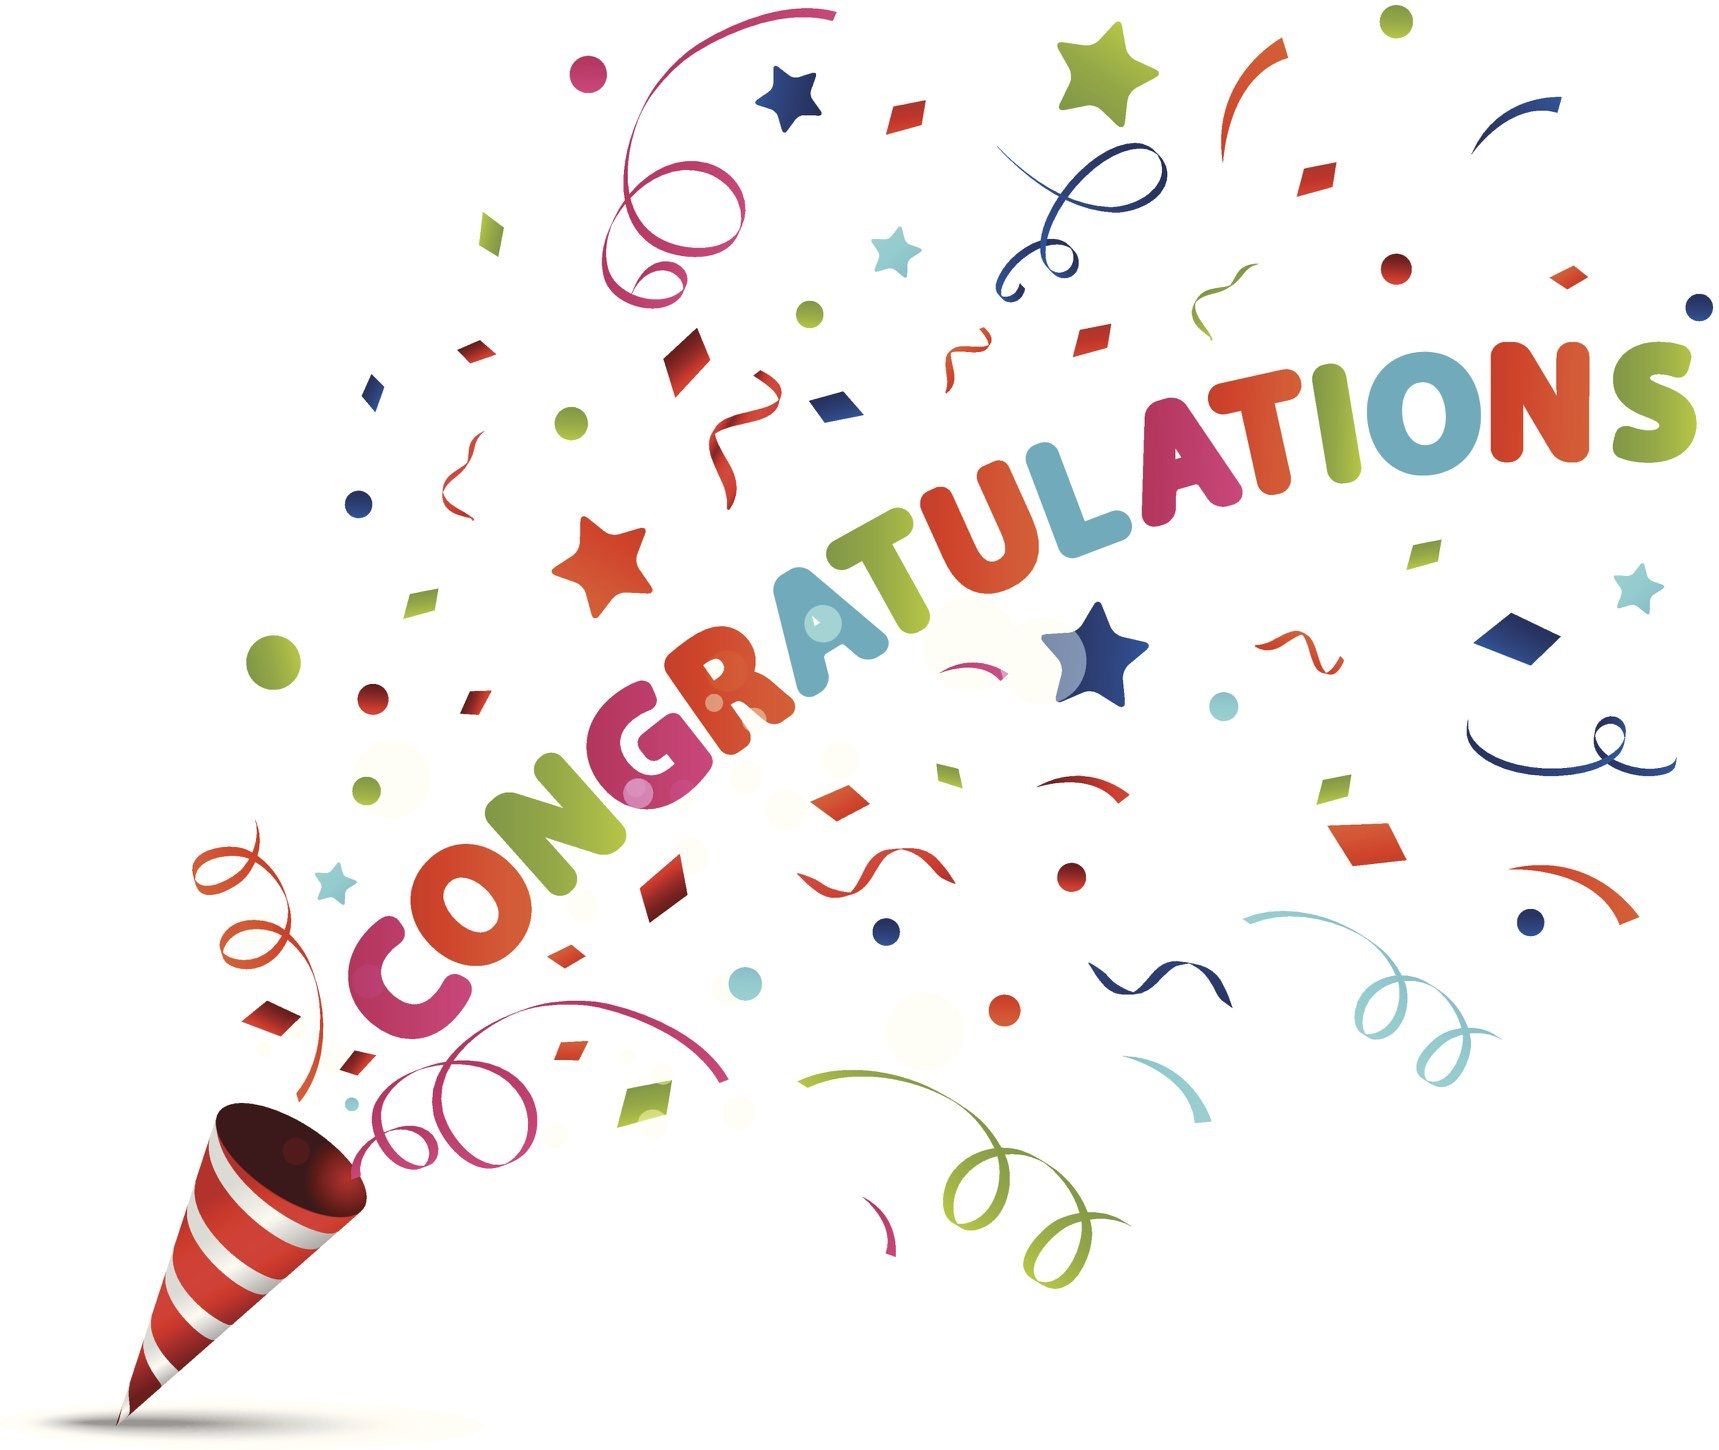